# Introduction to Tensorflow and Keras

You have seen some neural network theory and some examples of their capabilities, but how they are implemented?
Of course, you can implement NN using Octave or Matlab or use one of the many existing libraries. Today I will introduce to you to Tensorflow and Keras.

- Tensorflow is an open-source library designed by Google to train and develop ML models. It is used by researchers and developers alike.
- Keras is a high-level API that greatly simplifies the development of ML models.

Together, they make very easy to learn and code neural networks.

# Toy ML project

## Frame the ML problem

The best way to learn some new library is a working example, we will solve the hand-written digits detection problem described before. **Our goal is to design a model capable of classifying hand-writing digits from 0 to 9**.

First of all, as always, we must import the libraries. Keras is included inside TensorFlow so you can import Keras from TensorFlow.

In [2]:
import os
import time

import tensorflow as tf
from tensorflow import keras

2022-06-02 21:30:36.700464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 21:30:36.700492: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


We will also import some additional packages that will help us to visualize the data.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # to display images
from tqdm.notebook import tqdm # used to display a progress bar

## Collect a dataset

Now that we have a goal we need a dataset. Since the hand-written digits is a well-known hello-world problem, the MINST dataset is already included inside Keras. The MINST Dataset is composed by 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. After downloading the dataset we must check our data to see how it looks.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train input shape: ", x_train.shape)
print("Train output shape: ", y_train.shape)
print("Test input shape: ", x_test.shape)
print("Test output shape: ", y_test.shape)

Train input shape:  (60000, 28, 28)
Train output shape:  (60000,)
Test input shape:  (10000, 28, 28)
Test output shape:  (10000,)


### Exploratory data analysis

In [5]:
print(x_train[0])
print(type(x_train[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

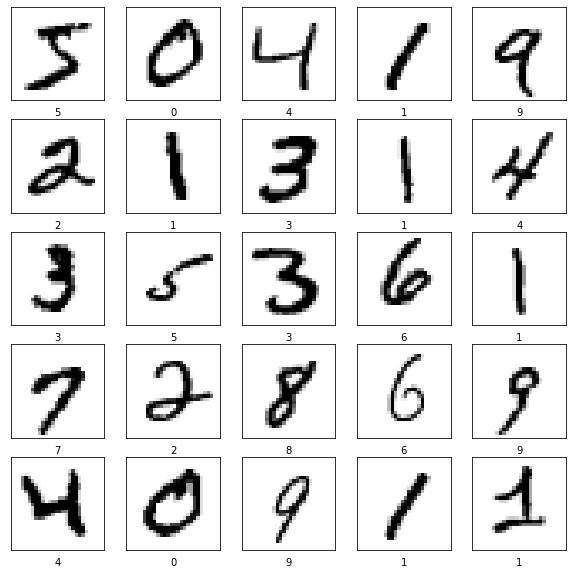

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

## Design a model

### Model 1: First approach and baseline model

We have a goal and a dataset that meets our needs. Now its time to design the model! Our first approach will be a simple perceptron similar to the one described in the presentation. Our neural net will be a sequential model as our layers are stacked one after the other.

- The first layer of our network is called **Flatten**. This layer only takes as an input the two-dimensional array of 28 x 28 pixel values and transforms it into a one-dimensional array of 784 pixels.
- The next layer is a **dense layer**. This layer is composed of 128 fully-connected neurons. Finally, the last one is a softmax layer formed by 10 neurons. This layer returns an array of 10 probability scores that sum 1. Each score indicates the probability that the input image belongs to one of the 10 classes.

Keras models have a built-in method called summary that reports the neural network architecture.

In [7]:
IMG_SIZE = (28, 28)
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape = IMG_SIZE),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-06-02 21:30:48.007555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 21:30:48.007582: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 21:30:48.007602: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (merca-VirtualBox): /proc/driver/nvidia/version does not exist
2022-06-02 21:30:48.007863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now let's talk about the parameters. The parameters are all the weights and biases of the neurons. As the first layer only reformats the data, it has no parameters to learn. The second layer has 100480 parameters. It is a fully connected layer so it means every neuron of this layer has a connection with every node of the previous layer and also the neurons have their own bias as a parameter.

$$ 784 * 128 + 128 = 100480 $$

The same goes for the last layer:

$$ 128 * 10 + 10 = 1290 $$

We are almost done. Before we can train the neural network we need to indicate how this model will be trained. This is configured using the compile method.
- Optimizer: This specifies how the parameters of the model are updated during training considering the data and the loss function. We will be using the adam optimizer, described in [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980).
- Loss function: This measures how accurate the model is during training. We will be minimizing this function to set the best parameters. In this project we will use a sparse categorical crossentropy loss. We can use this crossentropy loss function when there are two or more label classes and we expect labels to be provided as integers.
- Metrics: This is used to monitor different metrics during training and testing steps.

In [8]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now we can start training the model!! This is done using the fit method. We must specify the input data and the expected outputs (remember that neural networks are a supervised learning algorithm). We will also specify a validation set to see the performance of the net on unseen data. This will be very useful to diagnose training errors in the early stages of the training.

Additionally, we have to specify the batch size and the number of epochs.

- The batch_size is the number of samples that are feed in the network before updating its parameters. It is a hyperparameter of the network. There are some trade-offs that must be taken into account when establishing this number, like the memory available or the training speed.
- The number of epochs: indicates how many times the training set is feed into the network. It is also a hyperparameter of the neural network. There is also a trade-off whit this parameter as if it is too low the neural network will be underfed and if it is too large the network will be overfed.

In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard("logs/Model_1")

history = model_1.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    batch_size = 10,
                    epochs = 10,
                    callbacks=[tensorboard_callback])

model_1.save('Models/model_1.h5')

Epoch 1/10
6000/6000 [==============================] - 13s 2ms/step - loss: 1.6466 - accuracy: 0.8500 - val_loss: 0.4167 - val_accuracy: 0.9012
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.4034 - accuracy: 0.9068 - val_loss: 0.3511 - val_accuracy: 0.9137
Epoch 3/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3639 - accuracy: 0.9172 - val_loss: 0.2943 - val_accuracy: 0.9300
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3412 - accuracy: 0.9208 - val_loss: 0.3774 - val_accuracy: 0.9120
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3372 - accuracy: 0.9235 - val_loss: 0.3934 - val_accuracy: 0.9285
Epoch 6/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3331 - accuracy: 0.9254 - val_loss: 0.4473 - val_accuracy: 0.9246
Epoch 7/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3236 - accuracy: 0.9283 - val_loss: 0.3615 - val_ac

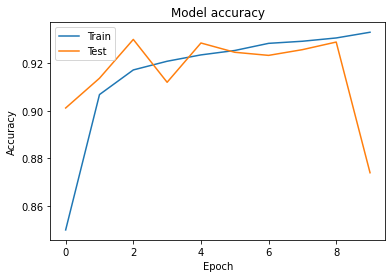

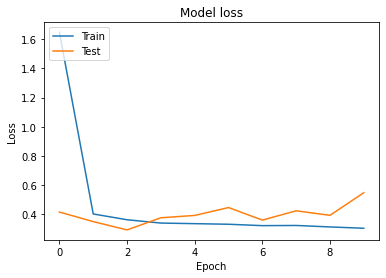

In [10]:
# Plot training & accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Improving the model: Normalizing the data

Our accuracy is not good enough for our purpose. Don't worry, this happens a lot when you are working in an ML project. We have to improve this! Our first step is to check the data. As yo known from previous classes is good to normalize the data, in the image field this is done by dividing our images by 255 as they are matrices of 8-bit integer values. As a result, we will obtain matrices with values between 0 and 1. This will speed out training. We will create a new model equal to the previous one but we will train it with the normalized dataset.

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape = IMG_SIZE),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model_2.summary()

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard("logs/Model_2")

history = model_2.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    batch_size = 10,
                    epochs = 10,
                    callbacks=[tensorboard_callback])

model_2.save('Models/model_2.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2022-06-02 21:32:35.091242: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


6000/6000 [==============================] - 11s 2ms/step - loss: 0.2153 - accuracy: 0.9363 - val_loss: 0.1055 - val_accuracy: 0.9692
Epoch 2/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.0956 - val_accuracy: 0.9717
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0655 - accuracy: 0.9789 - val_loss: 0.0806 - val_accuracy: 0.9748
Epoch 4/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 5/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 6/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0306 - accuracy: 0.9895 - val_loss: 0.0826 - val_accuracy: 0.9777
Epoch 7/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0831 - val_accuracy: 0.9784


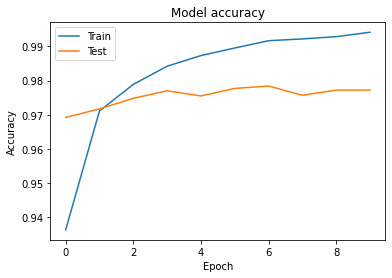

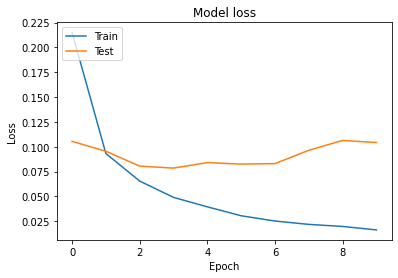

In [14]:
# Plot training & accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Improving the model: Convolutional Neural Networks (CNN)

We can improve the model's performance even further. We will use a new architecture designed to work with images called convolutional neural networks. This architecture uses special types of layers called convolutional layers and pooling layers.

Convolutional layers are designed to extract features of the content of the images by performing convolutions over the images using different filters learned during training. The layers can be implemented in 1,2 and 3 dimensions. For images, we will use convolutional layers for 2 dimensions.

<center><img src="assets/2d_convolution.png" alt="2D convolution" width="800"/></center>

<center><img src="assets/convolution.gif" alt="2D convolution" width="400"/></center>

> Gif source : https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

Max pooling layer is used to compress the features computed by the filters.

<center><img src="assets/max_pooling.png" alt="Max Pooling" width="800"/></center>

Now we will reshape the dataset to specify to the convolutional layer that these are grayscale images (one channel only).

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [16]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Let's see again the parameters of the network's layers. The first convolutional layer has 32 filters of 3 x 3 pixels. Each filter only has a bias term. As the filters are learned during the training, we have:

$$ 32 * 3 * 3 + 32 = 320 $$

As a result of applying 32 filters on a single image, we obtain 32 images, one for each filter. Beware that after applying max pooling to the output of the first conv2d we will have the dimensions halved. In the next conv2d layer will have:

$$ 32 * 32 * 3 * 3 + 32 = 9248 $$

In [17]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard("logs/Model_3")

history = model_3.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    batch_size = 10,
                    epochs = 10,
                    callbacks=[tensorboard_callback])

model_3.save('Models/model_3.h5')

Epoch 1/10


2022-06-02 21:34:14.025778: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


6000/6000 [==============================] - 37s 6ms/step - loss: 0.1159 - accuracy: 0.9642 - val_loss: 0.0410 - val_accuracy: 0.9858
Epoch 2/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0289 - val_accuracy: 0.9900
Epoch 3/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0337 - val_accuracy: 0.9883
Epoch 4/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0334 - val_accuracy: 0.9904
Epoch 5/10
6000/6000 [==============================] - 42s 7ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0463 - val_accuracy: 0.9866
Epoch 6/10
6000/6000 [==============================] - 41s 7ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0266 - val_accuracy: 0.9911
Epoch 7/10
6000/6000 [==============================] - 39s 7ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0289 - val_accuracy: 0.9

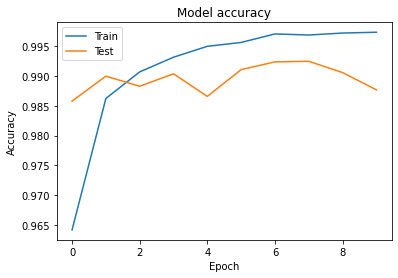

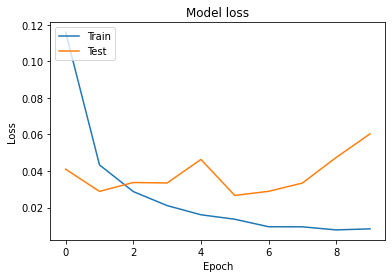

In [18]:
# Plot training & accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Improving the model: Dropout as regularitzation technique

The Dropout technique is one of the most famous techniques for regularization in NN. It makes it more difficult for the network to "memorize" patterns of the training data, by deactivating some neurons. This force the neurons to depend less on the outputs of other neurons, making their features more useful by themselves. This is only done during the training stage.

 The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [19]:
model_4 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [20]:
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard("logs/Model_4")

history = model_4.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    batch_size = 10,
                    epochs = 10,
                    callbacks=[tensorboard_callback])

model_4.save('Models/model_4.h5')

Epoch 1/10


2022-06-02 21:40:41.227670: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


6000/6000 [==============================] - 39s 6ms/step - loss: 0.1809 - accuracy: 0.9449 - val_loss: 0.0572 - val_accuracy: 0.9825
Epoch 2/10
6000/6000 [==============================] - 41s 7ms/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 0.0343 - val_accuracy: 0.9891
Epoch 3/10
6000/6000 [==============================] - 36s 6ms/step - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 4/10
6000/6000 [==============================] - 39s 6ms/step - loss: 0.0480 - accuracy: 0.9856 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 5/10
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 6/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 7/10
6000/6000 [==============================] - 36s 6ms/step - loss: 0.0325 - accuracy: 0.9903 - val_loss: 0.0345 - val_accuracy: 0.9